In [118]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [77]:
files = {
    'van': 'logs/bresson_best_*.txt',  # '(Baseline) Bresson TSP Transformer'
    'xl': 'logs/bressonxl_*.txt',  # 'TSP Transformer with XL Decoder'
    'xlr': 'logs/bressonxl_rpe_*.txt'  # 'TSP Transformer with XL Decoder and RPE'
}

In [78]:
n_epoch_count = 50
start_lines = [20, 22, 21]
metric_names = ['epoch_time', 'tot_time', 'L_train', 'L_base', 'L_test', 'gap_train']
result_dict = {'van': [], 'xl': [], 'xlr': []}
for (file, fname), start_line in zip(files.items(), start_lines):
    fname = glob(fname)[0]
    with open(fname, 'r') as f:
        lines = f.readlines()
        print(f'{file}:{fname}')
        assert lines[start_line][7] == '0'

        # for line in lines[start_line:start_line+n_epoch_count]:
        for line in lines[-n_epoch_count:]:
            metric_values = re.findall('[0-9]*\.[0-9]*', line)
            metric_dict = {k:v for k, v in zip(metric_names, metric_values)}
            result_dict[file].append(metric_dict)

van:logs/bresson_best_22-08-05--16-25-19-n50-gpu6.txt
xl:logs/bressonxl_22-08-08--14-21-05-n50-gpu7.txt
xlr:logs/bressonxl_rpe_22-08-07--16-36-01-n50-gpu5.txt


In [79]:
tmp = lambda x: pd.DataFrame.from_dict(x).astype('float')
df_van, df_xl, df_xlr = tmp(result_dict['van']), tmp(result_dict['xl']), tmp(result_dict['xlr'])
print(len(df_van), len(df_xl), len(df_xlr))

50 50 50


In [83]:
vm, xm, rm = df_van[-10:].mean(), df_xl[-10:].mean(), df_xlr[-10:].mean()

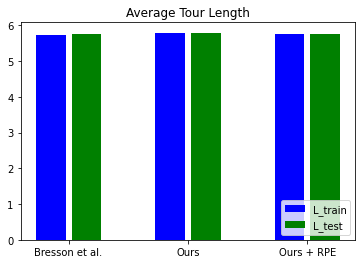

In [134]:
# L_train
# plt.yscale('log')
width=0.25
x_axis = np.arange(3); plus = 0.3
plt.bar(x_axis, [vm['L_train'], xm['L_train'], rm['L_train']], color='blue', width=width, label='L_train')
plt.bar(x_axis+plus, [vm['L_test'], xm['L_test'], rm['L_test']], color='green', width=width, label='L_test')
plt.xticks(x_axis+plus/2, ['Bresson et al.', 'Ours', 'Ours + RPE'])
plt.title('Average Tour Length')
plt.legend(loc=4)
# plt.yscale('log')
plt.show()

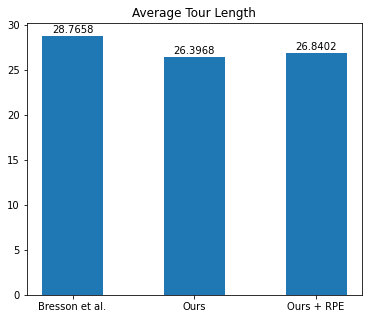

In [170]:
width=0.5
x_axis = np.arange(3); plus = 0.3
fig, ax = plt.subplots(figsize=(6,5))
rect = ax.bar(x_axis, [vm['epoch_time'], xm['epoch_time'], rm['epoch_time']], width=width, label='epoch_time')
# plt.bar(x_axis+plus, [vm['L_test'], xm['L_test'], rm['L_test']], color='green', width=width, label='L_test')
plt.xticks(x_axis, ['Bresson et al.', 'Ours', 'Ours + RPE'])
plt.title('Average Tour Length')
ax.bar_label(rect, padding=1)
plt.show()